In [1]:
import seesaw

In [2]:
import os
import importlib
import numpy as np
from tqdm.auto import tqdm

In [3]:
import ray

In [4]:
import seesaw.seesaw_bench
import seesaw.figures

importlib.reload(seesaw.seesaw_bench)
importlib.reload(seesaw.figures)

from seesaw.seesaw_bench import *
from seesaw.figures import *

In [5]:
ray.init('auto', namespace='seesaw')

2022-01-27 11:28:41,772	INFO worker.py:842 -- Connecting to existing Ray cluster at address: 172.31.130.187:6379


{'node_ip_address': '172.31.130.187',
 'raylet_ip_address': '172.31.130.187',
 'redis_address': '172.31.130.187:6379',
 'object_store_address': '/state/partition1/user/omoll/raytmp/session_2022-01-27_11-24-41_038046_37998/sockets/plasma_store',
 'raylet_socket_name': '/state/partition1/user/omoll/raytmp/session_2022-01-27_11-24-41_038046_37998/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/state/partition1/user/omoll/raytmp/session_2022-01-27_11-24-41_038046_37998',
 'metrics_export_port': 61723,
 'node_id': '4aa9a617ee0c6bbfe6d1416d93f69a2909fa5c09fd43122ef3eee5e6'}

In [6]:
import importlib

In [16]:
results_path = '/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/'
stats = get_metrics_table(results_path, at_N=300)

Map Progress: 100%|██████████| 200/200 [00:01<00:00, 169.56it/s]
/home/gridsan/omoll/seesaw/seesaw/figures.py:163: RuntimeWarning: invalid value encountered in floor_divide


In [17]:
stats.to_parquet('/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/computed_metrics.parquet')

In [7]:
stats = pd.read_parquet('/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/computed_metrics.parquet')

In [8]:
stats = stats.assign(dataset=stats.d_name,
                     index_name=stats.i_name,
                        category=stats.ground_truth_category,
                     variant=stats.name)

In [9]:
stats = stats.assign(variant=stats.variant.map(lambda x : {'baseline':'plain', 'multi':'multiplain'}.get(x,x)))

In [10]:
stats = stats.assign(reciprocal_12=1./stats.nfirst2second_batch)

In [11]:
(stats.nfirst == np.inf).sum()

21

In [12]:
stats.assign(first2sec_NA=stats.nfirst2second_batch.isna()).groupby(['dataset']).first2sec_NA.sum()

dataset
data/bdd/            0
data/coco/           0
data/dota/           0
data/lvis/         207
data/objectnet/      0
Name: first2sec_NA, dtype: int64

In [13]:
# paper: stop at 10 batches of 3
## check NDCG score of that.

### task

In [55]:
metric='reciprocal_rank'

by dataset


,multiplain,plain,seesaw,num_queries
dataset,,,,
data/bdd/,0.858221,0.842147,0.858221,29
data/coco/,0.968750,0.981250,0.968750,80
data/dota/,0.966667,0.827778,0.966667,15
data/lvis/,0.850305,0.787622,0.850305,1203
data/objectnet/,0.785455,0.784693,0.785455,313


bsw


,better,same,worse,total
dataset,,,,
data/bdd/,5,20,4,29
data/coco/,2,74,4,80
data/dota/,4,11,0,15
data/lvis/,256,860,87,1203
data/objectnet/,4,309,0,313
total,271,1274,95,1640


\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset         &         &       &        &        \\
\midrule
data/bdd/       &       5 &    20 &      4 &     29 \\
data/coco/      &       2 &    74 &      4 &     80 \\
data/dota/      &       4 &    11 &      0 &     15 \\
data/lvis/      &     256 &   860 &     87 &   1203 \\
data/objectnet/ &       4 &   309 &      0 &    313 \\
total           &     271 &  1274 &     95 &   1640 \\
\bottomrule
\end{tabular}

total_counts:  1640.0


part,.1,.3,1.
variant,,,
counts,151,107,1382
baseline,.04,.20,.92
this work,.17,.47,.94
ratio,4.03,2.32,1.03


\begin{tabular}{lrrr}
\toprule
part &   .1 &   .3 &   1. \\
variant   &      &      &      \\
\midrule
counts    &  151 &  107 & 1382 \\
baseline  &  .04 &  .20 &  .92 \\
this work &  .17 &  .47 &  .94 \\
ratio     & 4.03 & 2.32 & 1.03 \\
\bottomrule
\end{tabular}

ablation


part,.1,.1 delta,.3,.3 delta,1.,1. delta
variant,,,,,,
semantic embeddding,.04,NaN,.20,NaN,.92,NaN
+ multiscale search,.17,.13,.47,.27,.94,.02
+ feedback fusion,.17,.00,.47,.00,.94,.00


\begin{tabular}{lrrrrrr}
\toprule
part &  .1 &  .1 delta &  .3 &  .3 delta &  1. &  1. delta \\
variant             &     &           &     &           &     &           \\
\midrule
semantic embeddding & .04 &       NaN & .20 &       NaN & .92 &       NaN \\
+ multiscale search & .17 &       .13 & .47 &       .27 & .94 &       .02 \\
+ feedback fusion   & .17 &       .00 & .47 &       .00 & .94 &       .00 \\
\bottomrule
\end{tabular}



part,.1,.1 delta,.3,.3 delta,1.,1. delta
variant,,,,,,
semantic embeddding,0.043354,NaN,0.202947,NaN,0.921129,NaN
+ multiscale search,0.174792,0.131437,0.470124,0.267177,0.944513,0.023384
+ feedback fusion,0.174792,0.000000,0.470124,0.000000,0.944513,0.000000


/state/partition1/llgrid/pkg/anaconda/anaconda3-2021b/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


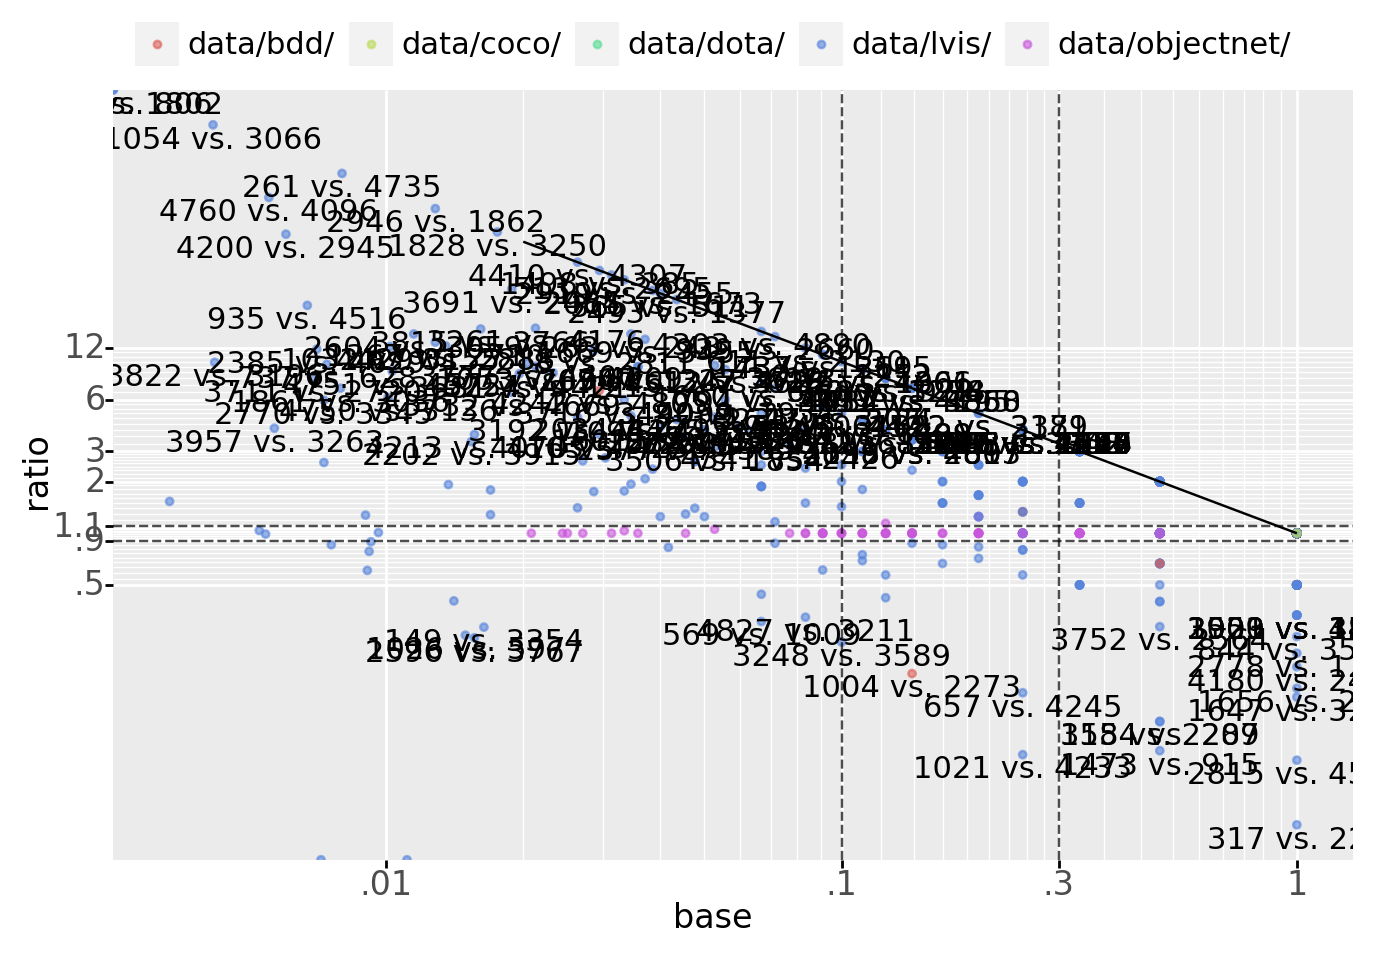

<ggplot: (8769757002792)>

In [56]:
tabs = print_tables(stats,variant='seesaw', baseline_variant='plain', metric=metric, reltol=1.05)

In [57]:
plotdata = tabs['plotdata']

In [70]:
# 2 cases multiscale found something plain did not
# 2 cases plain found somthing multiscal did not
# 5 cases neither found anything after that time
p = plotdata[(plotdata.base_nfirst == np.inf) | (plotdata.nfirst == np.inf)]
p.sort_values('reciprocal_rank')[['dataset', 'category', 'ratio', 'reciprocal_rank', 'nfirst', 'base_nfirst']]

,dataset,category,ratio,reciprocal_rank,nfirst,base_nfirst
333,data/lvis/,chap,0.0,0.000000,inf,139.0
729,data/lvis/,jewel,NaN,0.000000,inf,inf
2070,data/lvis/,dove,NaN,0.000000,inf,inf
2261,data/lvis/,wooden leg,NaN,0.000000,inf,inf
3827,data/lvis/,chime,NaN,0.000000,inf,inf
4510,data/lvis/,rodent,NaN,0.000000,inf,inf
4752,data/lvis/,file (tool),0.0,0.000000,inf,90.0
3610,data/lvis/,bob,inf,0.016667,60.0,inf
2042,data/lvis/,pipe bowl,inf,0.038462,26.0,inf


In [58]:
plotdata.sort_values('ratio')[['dataset', 'category', metric, 'base', 'ratio']].head(n=10)

,dataset,category,reciprocal_rank,base,ratio
333,data/lvis/,chap,0.000000,0.007194,0.000000
4752,data/lvis/,file (tool),0.000000,0.011111,0.000000
661,data/lvis/,nut,0.020000,1.000000,0.020000
4452,data/lvis/,corkboard,0.047619,1.000000,0.047619
2457,data/lvis/,cincture,0.012821,0.250000,0.051282
2257,data/lvis/,bow (weapon),0.027027,0.500000,0.054054
342,data/lvis/,popsicle,0.040000,0.500000,0.080000
611,data/lvis/,motor vehicle,0.040000,0.500000,0.080000
3426,data/lvis/,spear,0.111111,1.000000,0.111111
1734,data/lvis/,chalice,0.029412,0.250000,0.117647


In [60]:
from IPython.display import HTML
def session_link(session_path):
    return f"<a href='file://{session_path}'>{session_path}</a>"

def comp(plotdata, dataset, category):
    cols = ['variant', 'dataset', 'category', metric, 'nfirst','nfirst_batch', 'nfirst2second_batch', 'ntotal', 'session_path']
    st = stats[(stats.dataset == dataset) & (stats.category == category)]
    v = st[cols].set_index('variant')
    v = v.loc[['plain', 'multiplain', 'seesaw']]
    return HTML(v.to_html(escape=False, formatters=dict(session_path=session_link)))

In [72]:
comp(plotdata, 'data/lvis/', 'chap')
# chap is defined as cowboy chaps (some leather gear). very small. 
# both results shown by plain have a cowboy context
# both multiscale and plain kind of interpret it as a boy or young man.

,dataset,category,reciprocal_rank,nfirst,nfirst_batch,nfirst2second_batch,ntotal,session_path
variant,,,,,,,,
plain,data/lvis/,chap,0.007194,139.0,46.0,12.0,12,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-174355_elphwgomyx/
multiplain,data/lvis/,chap,0.000000,inf,NaN,NaN,12,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-180323_uhgigzmsig/
seesaw,data/lvis/,chap,0.000000,inf,NaN,NaN,12,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-175113_qrcvfdxsdm/


In [61]:
comp(plotdata, 'data/lvis/', 'file (tool)')
# the plain method confuses lots of knives-like objects as well as paper.
# the files are small in size. maybe part of it is the description of the activity in this case (filing a horse hoof)
# the other methods do return 

,dataset,category,reciprocal_rank,nfirst,nfirst_batch,nfirst2second_batch,ntotal,session_path
variant,,,,,,,,
plain,data/lvis/,file (tool),0.011111,90.0,30.0,33.0,3,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-175450_ckvlwuokvu/
multiplain,data/lvis/,file (tool),0.000000,inf,NaN,NaN,3,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-175636_ykobjtmyhj/
seesaw,data/lvis/,file (tool),0.000000,inf,NaN,NaN,3,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-180317_avitarvbwb/


In [74]:
comp(plotdata, 'data/lvis/', 'nut')
## nuts are relatively plentiful in plain. they seem to be dfined as anything like a screw with an nut shape.
# fire hydrants have lots of them
# banana nut cereal shows sup
# banana also shows up

,dataset,category,reciprocal_rank,nfirst,nfirst_batch,nfirst2second_batch,ntotal,session_path
variant,,,,,,,,
plain,data/lvis/,nut,1.00,1.0,0.0,2.0,114,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-173950_mylaquzyox/
multiplain,data/lvis/,nut,0.02,50.0,16.0,1.0,114,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-175444_musrgoczxu/
seesaw,data/lvis/,nut,0.02,50.0,16.0,1.0,114,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-174002_npirdgtzey/


In [53]:
comp(plotdata, 'data/lvis/', 'coverall') 
# multiplain helps find the first result

,dataset,category,reciprocal_12,nfirst,nfirst_batch,nfirst2second_batch,ntotal,session_path
variant,,,,,,,,
plain,data/lvis/,coverall,1.000000,1.0,0.0,1.0,6,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-175105_bijbvkseud/
multiplain,data/lvis/,coverall,0.142857,1.0,0.0,7.0,6,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-175005_rrdthbkczo/
seesaw,data/lvis/,coverall,0.142857,1.0,0.0,7.0,6,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-175410_mtfsnjnvga/


In [54]:
comp(plotdata, 'data/lvis/', 'checkerboard') # interesting: first was good, but second was delayed.
# this means that multiscale worked to get the first example but somehow made the second one take longer...
# refining did help

,dataset,category,reciprocal_12,nfirst,nfirst_batch,nfirst2second_batch,ntotal,session_path
variant,,,,,,,,
plain,data/lvis/,checkerboard,0.500000,125.0,41.0,2.0,4,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-173937_tuczszoari/
multiplain,data/lvis/,checkerboard,0.033333,1.0,0.0,30.0,4,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-174705_nwktwncjhe/
seesaw,data/lvis/,checkerboard,0.055556,1.0,0.0,18.0,4,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-175358_jljdviuxvo/


In [37]:
comp(plotdata, 'data/lvis/', 'goldfish')

,dataset,category,reciprocal_12,nfirst,nfirst_batch,nfirst2second_batch,ntotal,session_path
variant,,,,,,,,
seesaw,data/lvis/,goldfish,0.025641,2.0,0.0,39.0,3,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-175659_arvakczfvi/
plain,data/lvis/,goldfish,0.333333,1.0,0.0,3.0,3,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-173608_ovyhbgvkdl/
multiplain,data/lvis/,goldfish,0.011236,2.0,0.0,89.0,3,/home/gridsan/omoll/bench_results/bench_eQtGlaAAtM/session_20220124-174439_ayevgtuxza/
